# Create and testing the model

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./Datasets/clean_immo.csv", sep=',')
df.head()

,locality,type_of_property,subtype_of_property,price,number_of_rooms,house_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,city_name,lattitude,longitude
0,1050,house,house,340000,6,203,95,2,0,to be done up,Ixelles,4.381571,50.822285
1,1050,house,mixed use building,520000,4,200,69,2,0,to renovate,Ixelles,4.381571,50.822285
2,1050,house,house,599000,4,160,100,2,0,to be done up,Ixelles,4.381571,50.822285
3,1050,house,house,599000,3,160,130,2,0,good,Ixelles,4.381571,50.822285
4,1050,house,house,575000,3,171,46,2,0,just renovated,Ixelles,4.381571,50.822285


In [3]:
house = df[df['type_of_property'] == 'house']
apart = df[df['type_of_property'] == 'apart']

In [4]:
print(df.isnull().sum())

locality                 0
type_of_property         0
subtype_of_property      0
price                    0
number_of_rooms          0
house_area               0
surface_of_the_land      0
number_of_facades        0
swimming_pool            0
state_of_the_building    0
city_name                0
lattitude                0
longitude                0
dtype: int64


In [5]:
df.corr()

,locality,price,number_of_rooms,house_area,surface_of_the_land,number_of_facades,swimming_pool,lattitude,longitude
locality,1.000000,-0.217740,-0.057123,-0.026547,-0.013859,-0.030348,-0.032768,-0.543249,-0.050896
price,-0.217740,1.000000,0.405251,0.561674,0.161325,0.266230,0.206197,-0.075121,0.252055
number_of_rooms,-0.057123,0.405251,1.000000,0.557277,0.076173,0.125359,0.086292,0.069133,-0.077991
house_area,-0.026547,0.561674,0.557277,1.000000,0.140103,0.202773,0.156983,0.015200,0.003375
surface_of_the_land,-0.013859,0.161325,0.076173,0.140103,1.000000,0.146005,0.056848,0.042935,-0.038331
number_of_facades,-0.030348,0.266230,0.125359,0.202773,0.146005,1.000000,0.140024,0.141329,-0.078037
swimming_pool,-0.032768,0.206197,0.086292,0.156983,0.056848,0.140024,1.000000,0.025205,-0.008948
lattitude,-0.543249,-0.075121,0.069133,0.015200,0.042935,0.141329,0.025205,1.000000,-0.361914
longitude,-0.050896,0.252055,-0.077991,0.003375,-0.038331,-0.078037,-0.008948,-0.361914,1.000000


In [6]:
X = house.drop(['type_of_property', 'locality', 'price', 'lattitude', 'longitude', 'city_name'], axis=1)
y = pd.DataFrame()
y['price'] = house['price']
print(X.dtypes)
print(X.shape)
print(y.shape)
X.head()

subtype_of_property      object
number_of_rooms           int64
house_area                int64
surface_of_the_land       int64
number_of_facades         int64
swimming_pool             int64
state_of_the_building    object
dtype: object
(20743, 7)
(20743, 1)


,subtype_of_property,number_of_rooms,house_area,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building
0,house,6,203,95,2,0,to be done up
1,mixed use building,4,200,69,2,0,to renovate
2,house,4,160,100,2,0,to be done up
3,house,3,160,130,2,0,good
4,house,3,171,46,2,0,just renovated


In [7]:
# Get dummies for object type
X_columns_name = ['subtype_of_property', 'state_of_the_building']
X = pd.get_dummies(X, columns=X_columns_name, prefix=X_columns_name, drop_first=True)

In [8]:
X.head()

,number_of_rooms,house_area,surface_of_the_land,number_of_facades,swimming_pool,subtype_of_property_bungalow,subtype_of_property_chalet,subtype_of_property_country cottage,subtype_of_property_exceptional property,subtype_of_property_farmhouse,...,subtype_of_property_mixed use building,subtype_of_property_other property,subtype_of_property_town house,subtype_of_property_villa,state_of_the_building_good,state_of_the_building_just renovated,state_of_the_building_to be done up,state_of_the_building_to renovate,state_of_the_building_to restore,state_of_the_building_unknown
0,6,203,95,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4,200,69,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,4,160,100,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,160,130,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,171,46,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Make the pipeline
degree = 3

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [19]:
# Fit the model
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [20]:
polyreg.score(X_train, y_train)

0.5705914304026286

<function matplotlib.pyplot.show(close=None, block=None)>

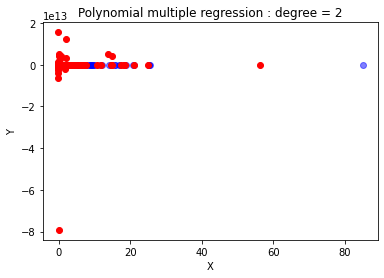

In [21]:
pred = polyreg.predict(X_test)

plt.scatter(X_train[:,2:3], y_train, alpha=0.5, color='blue')
plt.scatter(X_test[:,2:3], pred, color='red')
plt.title('Polynomial multiple regression : degree = 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [22]:
polyreg.score(X_test, y_test)

-51264359922788.46